In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib

In [30]:
df = pd.read_csv("dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [32]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

Text(0, 0.5, 'count')

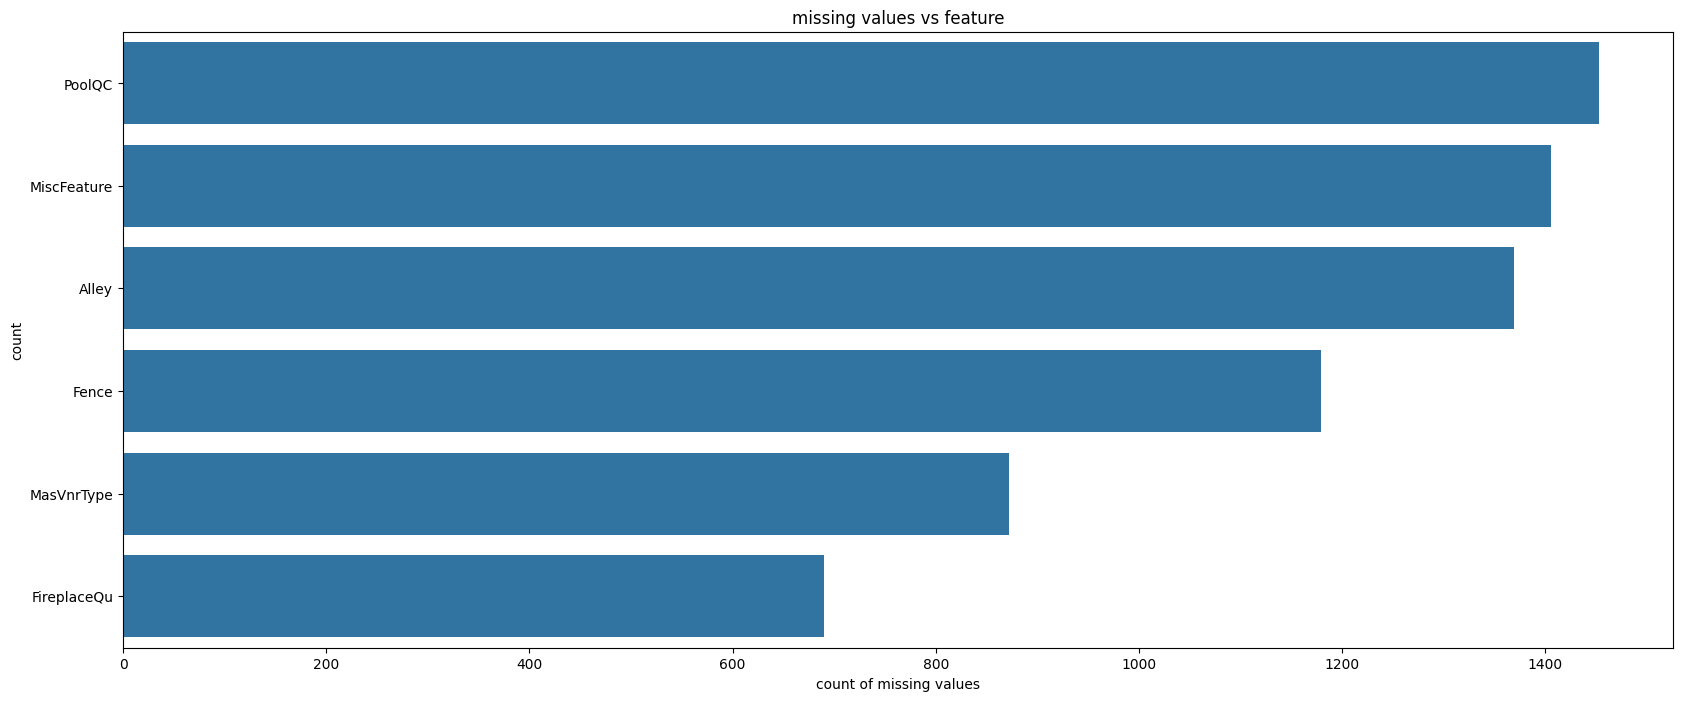

In [33]:
m_values = missing_values[missing_values > 500]
plt.figure(figsize=(20,8))
sns.barplot(x=m_values, y=m_values.index)
plt.title("missing values vs feature")
plt.xlabel("count of missing values")
plt.ylabel("count")

In [34]:
df = df.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [35]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [36]:
C_columns = df.select_dtypes(include=['object','category']).columns
print(C_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [37]:
label_encorder = LabelEncoder()
for col in ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']:
    df[col] = label_encorder.fit_transform(df[col])

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [38]:
corr_matrix =df.corr()
corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_price)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
GarageType     -0.415283
GarageFinish   -0.549247
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
Name: SalePrice, Length: 74, dtype: float64


In [39]:
c_features_index= corr_with_price[corr_with_price>0.25].index
df = df[c_features_index]
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir
0,208500,7,1710,2,548,856,856,2,8,2003,...,0,706,2,65.0,0,854,61,1,8450,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1,978,1,80.0,298,0,0,0,9600,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,1,486,2,68.0,0,866,42,1,11250,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,1,216,0,60.0,0,756,35,0,9550,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,1,655,2,84.0,192,1053,84,1,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,1,0,2,62.0,0,694,40,1,7917,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,2,790,1,85.0,349,0,0,0,13175,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,2,275,4,66.0,0,1152,60,0,9042,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,0,49,1,68.0,366,0,0,0,9717,1


Text(0.5, 1.0, 'correlation heat maps between variables')

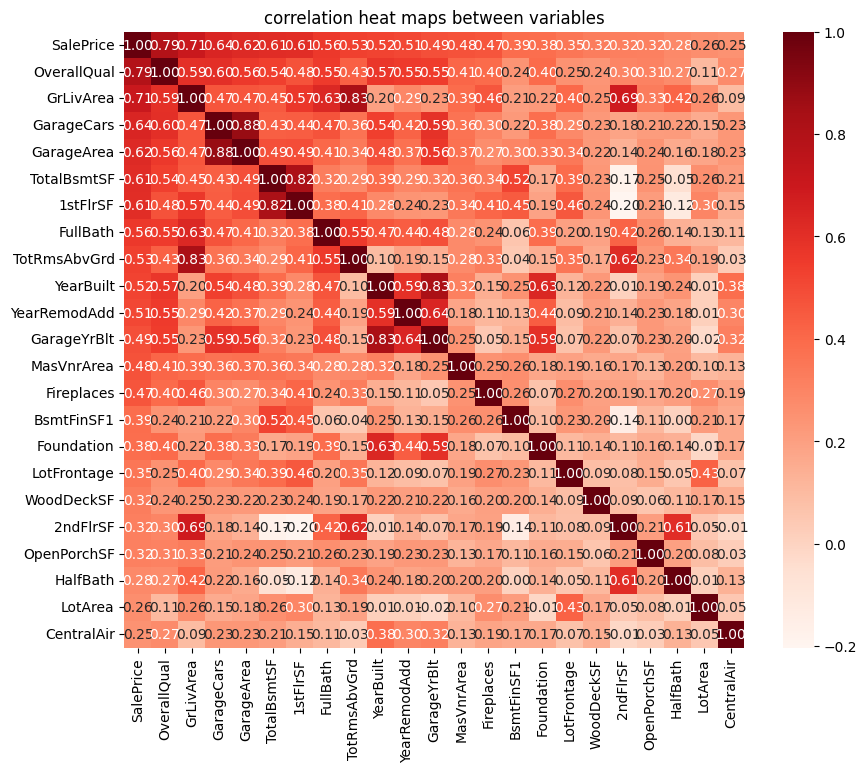

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_with_price[corr_with_price>0.25].index].corr(), annot=True, fmt= '.2f', cmap= 'Reds')
plt.title('correlation heat maps between variables')

In [41]:
df = df.drop(columns = ['GarageCars','GarageYrBlt','TotRmsAbvGrd','Foundation','2ndFlrSF','HalfBath','TotalBsmtSF'])
df.sample(5)

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,LotArea,CentralAir
272,290000,8,2270,671,1164,2,1999,2007,348.0,1,524,92.0,132,57,11764,1
1392,123000,5,900,288,900,1,1967,1967,0.0,1,769,68.0,175,144,7838,1
1410,230000,7,1840,622,944,2,2001,2001,0.0,0,666,79.0,0,45,12420,1
91,98600,5,1235,480,1235,1,1961,1961,203.0,0,600,85.0,0,0,8500,1
1067,167900,6,1611,442,798,1,1964,1964,360.0,0,674,80.0,328,128,9760,1


In [42]:
df.isnull().sum()


SalePrice         0
OverallQual       0
GrLivArea         0
GarageArea        0
1stFlrSF          0
FullBath          0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
OpenPorchSF       0
LotArea           0
CentralAir        0
dtype: int64

In [43]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean)


In [44]:
df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
OpenPorchSF     0
LotArea         0
CentralAir      0
dtype: int64

In [45]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

x=df.drop('SalePrice', axis=1)
y=df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

C:\Users\chamod\AppData\Local\Temp\ipykernel_14788\65029692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)


In [46]:
# Initialize and fit the model
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    subsample=0.65,
    random_state=42
)

model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [47]:
y_pred = model.predict(x_test)

In [48]:
MAE = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error : ", MAE)

r2score = r2_score(y_test,y_pred)
print("R2 score : ", r2score)

Mean Absolute Error :  18133.4453125
R2 score :  0.8996551036834717
